In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as mpl
#plt.style.use(['fivethirtyeight'])
import warnings
warnings.filterwarnings("ignore")

### 1. Understand the dataset

In [41]:
# 1.1 import the dataset
df=pd.read_csv('Data/311_Service_Requests_from_2010_to_Present.csv')
# 1.2 Visualize the dataset
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [3]:
# 1.3 Print the columns of the DataFrame
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
# 1.4 Identify the shape of the DataFrame
df.shape

(364558, 53)

In [6]:
# 1.5 Identify variables with null values
df.columns[df.isna().any()].tolist()

['Closed Date',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Due Date',
 'Resolution Action Updated Date',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'School Region',
 'School Code',
 'School Zip',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

### 2. Perform basic data exploratory analysis

In [7]:
# Counting the number of NaN for each column
df.isnull().sum().sort_values(ascending=False)  
# Counting the percentage of NaN for each column
#df.isnull().sum().sort_values(ascending=False)/len(df) #NaN percentage for each column

School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Location             364558
Garage Lot Name                   364558
Ferry Direction                   364557
Ferry Terminal Name               364556
Road Ramp                         364296
Bridge Highway Segment            364296
Bridge Highway Name               364261
Bridge Highway Direction          364261
Landmark                          364183
Intersection Street 2             314046
Intersection Street 1             313438
Cross Street 2                     57805
Cross Street 1                     57188
Street Name                        51699
Incident Address                   51699
Descriptor                          6501
X Coordinate (State Plane)          4030
Latitude                            4030
Longitude                           4030
Y Coordinate (State Plane)          4030
Location                            4030
Address Type    

<Axes: >

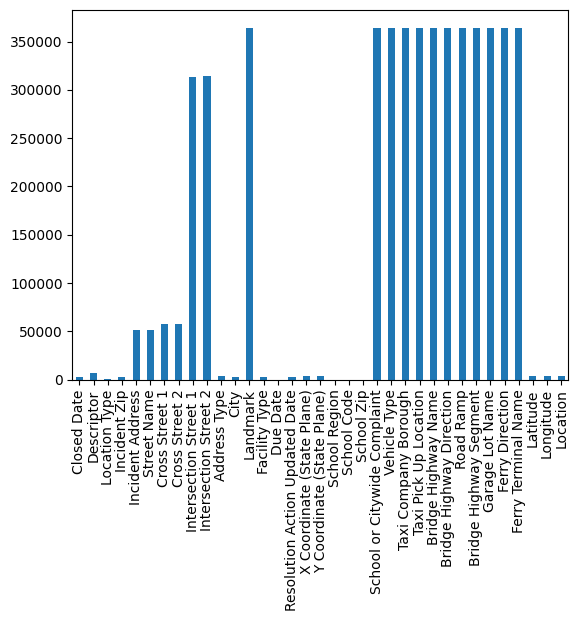

In [8]:
# 2.1 Draw a frequency plot to show the number of null values in each column of the DataFRame
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

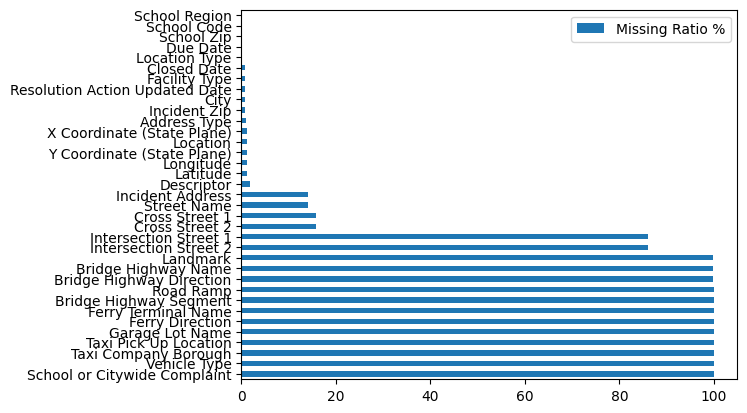

In [9]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [10]:
df2=df[df['Closed Date'].isnull()== True]
df2.shape

(2381, 53)

In [11]:
# 2.2 Missing Value Treatment
# 2.2.1 Remove the records whose Closed Date values are null
df = df.dropna(axis=0, subset=['Closed Date'])
df.shape

(362177, 53)

##### 2.3 Analyse the date column, and remove entries that have an incorrect timeline

In [12]:
# 2.3.1 Calculate the time elapsed in closed and creation date
df['Closed Date'] =  pd.to_datetime(df['Closed Date'])#, format='%d%b%Y:%H:%M:%S.%f')
df['Created Date'] =  pd.to_datetime(df['Created Date'])
df['Time Elapsed']=df['Closed Date']-df['Created Date']
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44


In [13]:
# 2.3.2 Convert the calculated date to seconds to get a better representation
df['Time Elapsed'] = df['Time Elapsed'].dt.total_seconds().astype(int)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464


In [14]:
# 2.3.3 View the descriptive statistics for the newly created column
df['Time Elapsed'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Time Elapsed, dtype: float64

In [15]:
# 2.3.4 Check the number of null values in the Complaint_Type and City Column
nan_ComplaintType_count = df['Complaint Type'].isna().sum()
print(nan_ComplaintType_count)
nan_City_count = df['City'].isna().sum()
print(nan_City_count)

0
674


In [16]:
# 2.3.5 Impute the NA value with Unknown City
df['City']=df['City'].replace(np.nan, 'Unknown City')  
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464


In [17]:
df[df.City=='Unknown City']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed
33,32306700,2015-12-31 23:18:10,2016-01-02 01:04:03,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92753
283,32309451,2015-12-31 17:40:16,2016-01-01 10:59:11,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,72-23-72-2 72ND PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62335
302,32309860,2015-12-31 17:05:30,2016-01-01 08:17:35,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,9-15-9-99 CORNAGA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54725
1421,32299438,2015-12-30 11:55:25,2015-12-30 14:35:54,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,NaN,101 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9629
2131,32294310,2015-12-29 14:53:28,2015-12-29 17:46:06,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,3300-3398 37TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361851,29633795,2015-01-04 23:19:28,2015-01-05 10:13:06,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,25-40-25-4 48TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39218
361912,29632589,2015-01-04 21:20:56,2015-01-05 13:46:10,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,47-22-47-9 216TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59114
361975,29633040,2015-01-04 20:04:21,2015-01-05 13:07:15,NYPD,New York City Police Department,Noise - Commercial,Car/Truck Horn,Store/Commercial,NaN,58-28-58-9 99TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61374
362048,29633311,2015-01-04 18:21:17,2015-01-06 08:26:39,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,26000-2609 79TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137122


<Axes: >

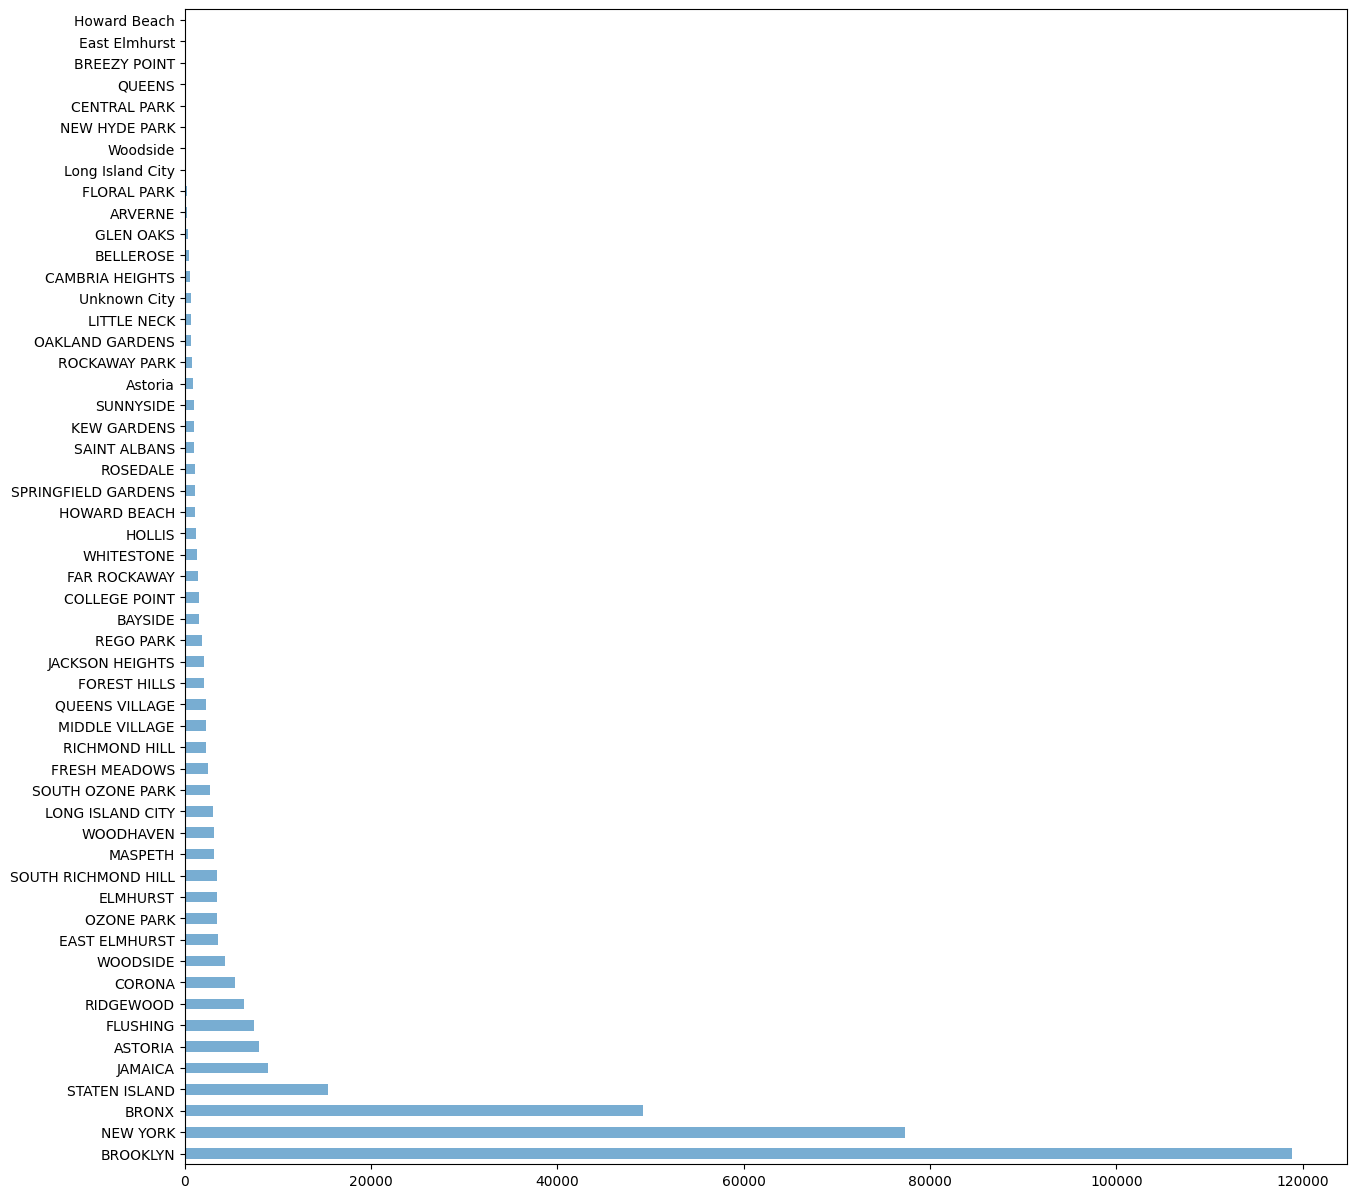

In [18]:
# 2.3.6 Draw a frequency plot for the complaints in each city
df.City.value_counts().plot(kind='barh',alpha=0.6,figsize=(15,15))

In [19]:
# 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn
df_Brooklyn = df[df['City']=='BROOKLYN']

(-74.05061403028367, -73.84647934348564, 40.561126853754885, 40.78979838623255)

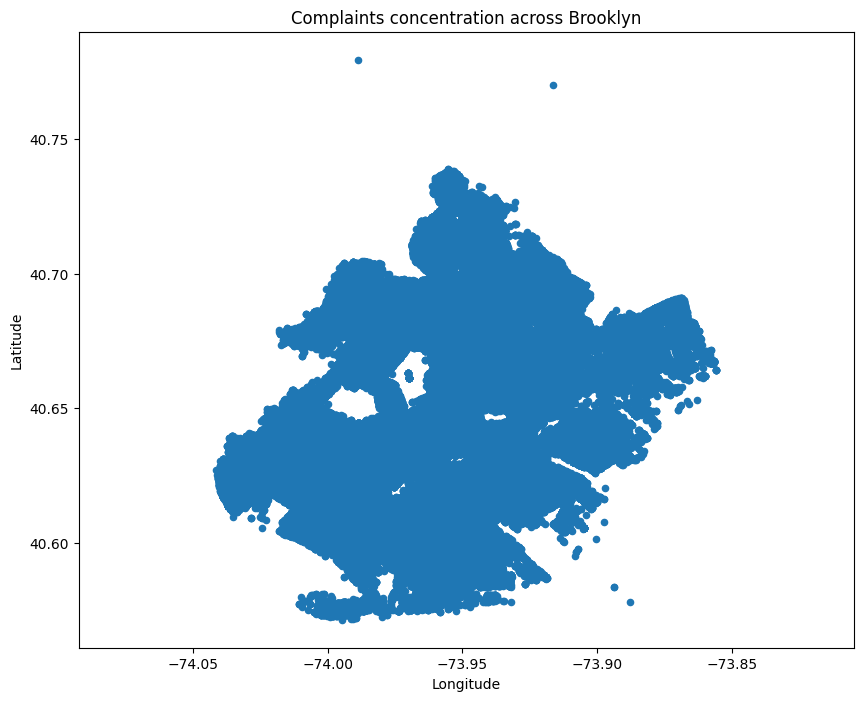

In [20]:
# Scatter plot
df_Brooklyn.plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

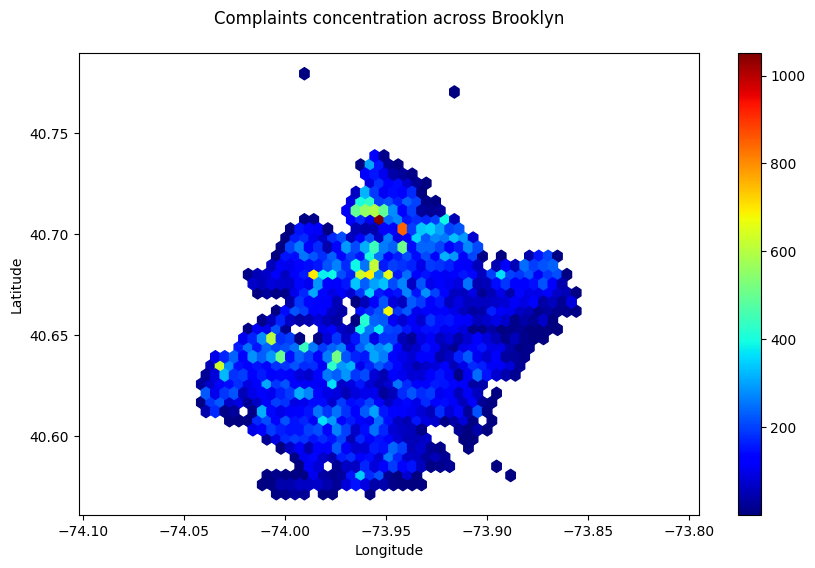

In [21]:
# Hexbin
df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')


### 3. Find major types of complaints:

<Axes: >

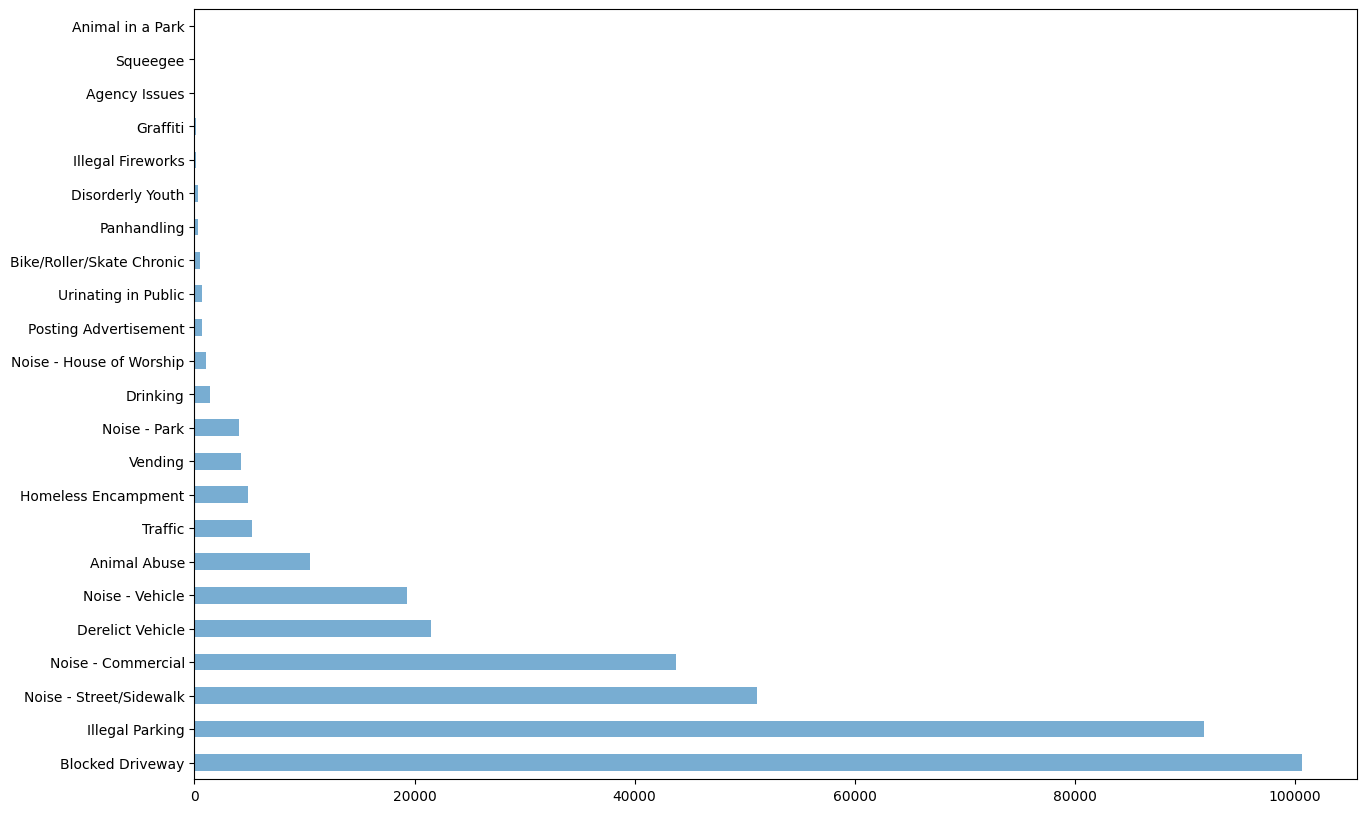

In [22]:
# 3.1 Plot a bar graph to show the types of complaints
df['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,10))

In [23]:
# 3.2 Check the frequency of various types of complaints for New York City
df_NY = df[df['City']=='NEW YORK']
df_NY.shape

(77289, 54)

<Axes: >

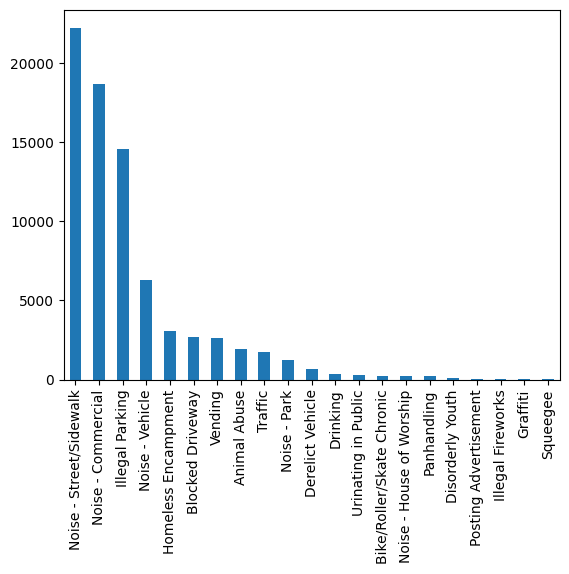

In [24]:
df_NY['Complaint Type'].value_counts().plot(kind='bar')

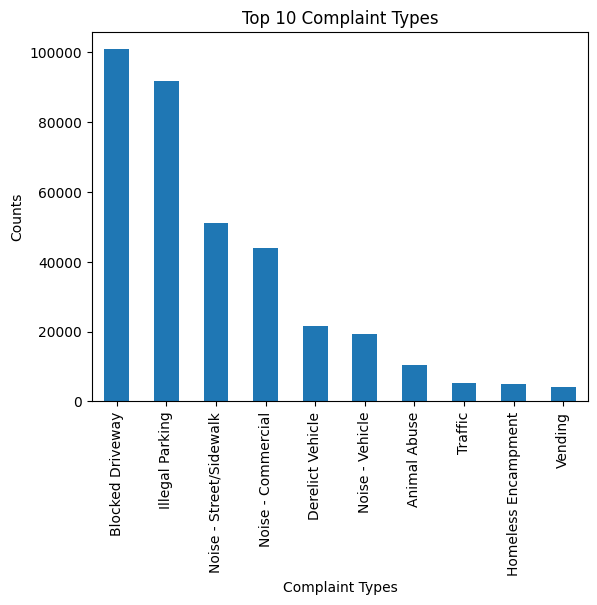

In [25]:
# 3.3. Find the top 10 complaint types
df['Complaint Type'].value_counts().head(10).plot(kind='bar',title='Top 10 Complaint Types', xlabel='Complaint Types', ylabel='Counts')
plt.show()

#df['Complaint Type'].value_counts()[:10].plot(kind='barh',alpha=0.6,figsize=(15,10))

In [26]:
# 3.4 Display the various types of complaints in each city
citywisecomplaints = df.groupby(['City','Complaint Type']).size()
citywisecomplaints = pd.DataFrame({'Count':citywisecomplaints}).reset_index()
citywisecomplaints  #New Dataset

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
787,Woodside,Blocked Driveway,27
788,Woodside,Derelict Vehicle,8
789,Woodside,Illegal Parking,124
790,Woodside,Noise - Commercial,2


In [27]:
# 3.5 Create a DataFrame , df_new, which contains cities as columns and complaint types in rows
df_new = df.groupby(['Complaint Type', 'City']).size().unstack()
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
Animal Abuse,46.0,170.0,NaN,53.0,15.0,2.0,1971.0,3191.0,15.0,NaN,...,74.0,40.0,42.0,786.0,40.0,1.0,43.0,57.0,111.0,NaN
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,16.0,NaN,NaN,1.0,NaN,22.0,124.0,NaN,NaN,...,1.0,1.0,NaN,10.0,2.0,2.0,4.0,2.0,5.0,NaN
Blocked Driveway,50.0,3436.0,159.0,514.0,138.0,3.0,17062.0,36445.0,177.0,NaN,...,1202.0,1946.0,330.0,2845.0,278.0,86.0,279.0,1363.0,2038.0,27.0
Derelict Vehicle,32.0,426.0,14.0,231.0,120.0,3.0,2402.0,6257.0,148.0,NaN,...,425.0,356.0,267.0,2184.0,17.0,63.0,279.0,369.0,298.0,8.0
Disorderly Youth,2.0,5.0,NaN,2.0,2.0,NaN,66.0,79.0,NaN,NaN,...,2.0,2.0,NaN,25.0,2.0,NaN,1.0,NaN,1.0,NaN
Drinking,1.0,43.0,NaN,1.0,1.0,1.0,206.0,291.0,NaN,NaN,...,14.0,25.0,6.0,188.0,12.0,3.0,3.0,4.0,15.0,NaN
Graffiti,1.0,4.0,NaN,3.0,NaN,NaN,15.0,60.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,NaN,1.0,NaN,4.0,NaN


<Axes: >

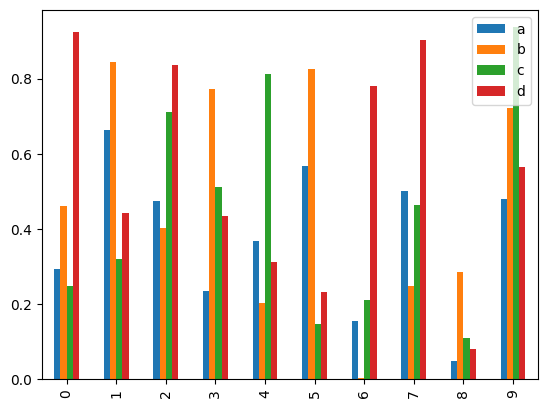

In [28]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2
df2.plot.bar()

### 4. Visualize the major types of complaints in each city

<Axes: xlabel='City'>

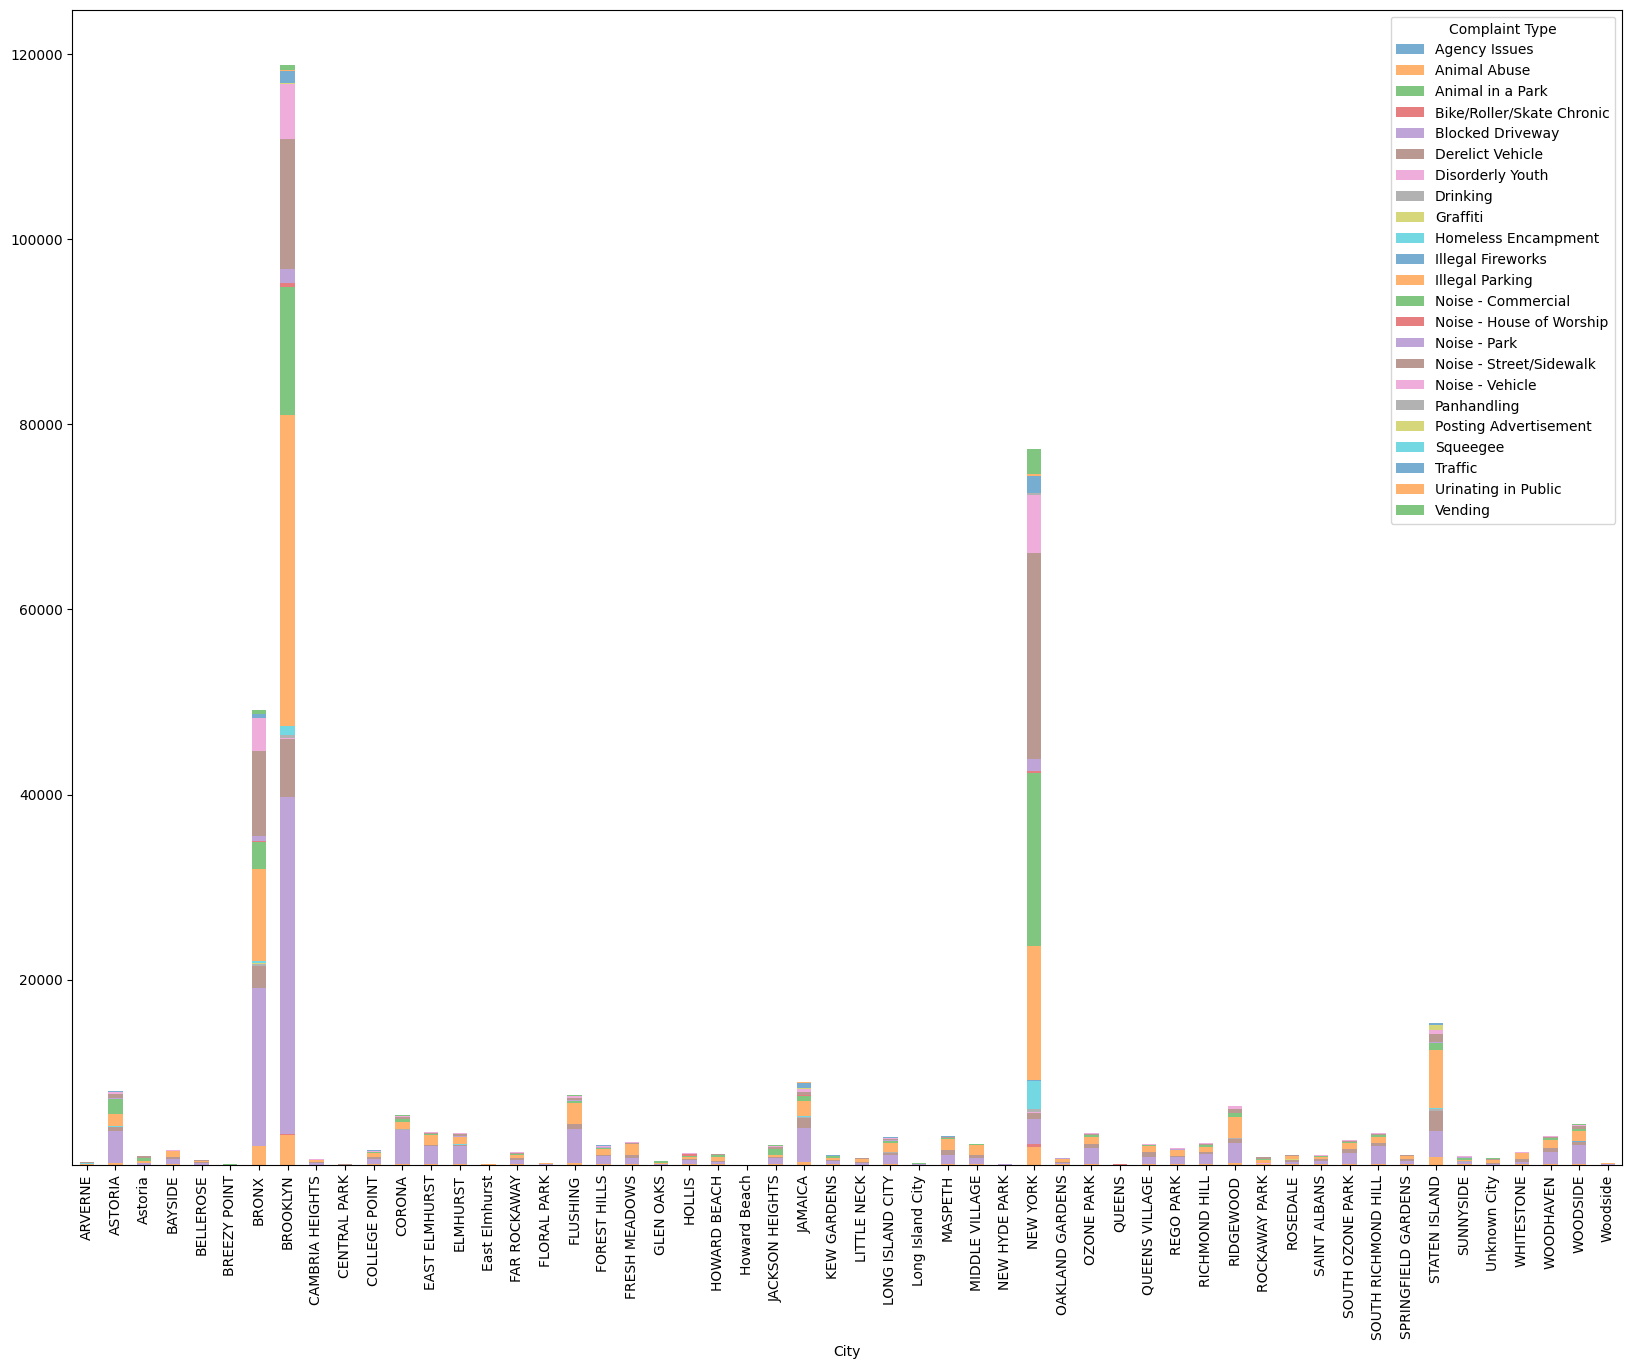

In [29]:
# 4.1 Draw another chart that shows the types of complaints in each city in a single chart, 
# where different colors show the different types of complaints
citywisecomplaints1 = df.groupby(['City','Complaint Type']).size().unstack()

citywisecomplaints1.plot(kind='bar',alpha=0.6,figsize=(20,15),stacked=True)

In [30]:
# 4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations
Resolution = df.groupby(['Complaint Type','Borough'])[['Time Elapsed']].mean().unstack()
#Resolution = df.groupby(['Complaint Type','City'])[['Time Elapsed']].mean().unstack()
Resolution

Time Elapsed                              \
Borough                           BRONX      BROOKLYN     MANHATTAN   
Complaint Type                                                        
Agency Issues                       NaN           NaN           NaN   
Animal Abuse               25230.563673  16698.195863  12756.151984   
Animal in a Park                    NaN           NaN           NaN   
Bike/Roller/Skate Chronic  13576.636364  16918.798387  10163.185039   
Blocked Driveway           21103.643770  15202.162327  12341.806726   
Derelict Vehicle           31531.592423  20446.087089  14536.004323   
Disorderly Youth           15103.757576  14538.341772   8133.419753   
Drinking                   20399.587379  13016.518900  10896.962617   
Graffiti                   27618.266667  24721.266667  17321.200000   
Homeless Encampment        25843.974453  16943.745781  13075.100881   
Illegal Fireworks          20189.500000   8424.754098   7290.000000   
Illegal Parking            22444.724919  14813.091942  11910.247372   
Noise - Commercial         16481.785666  10689.997474   9665.219459   
Noise - House of Worship   16168.588889  11131.370180   8009.207207   
Noise - Park               16933.045620  11324.975873  10517.983105   
Noise - Street/Sidewalk    18738.133122  11762.204992   9739.167255   
Noise - Vehicle            19748.060742  11554.233026   9261.498411   
Panhandling                50782.100000  15540.816327  12619.116505   
Posting Advertisement      11889.722222  11858.086207  10721.448980   
Squeegee                            NaN           NaN  14560.250000   
Traffic                    17070.020979  10896.683333   9487.343503   
Urinating in Public        19633.685185  13566.135484  10342.284091   
Vending                    23882.066975  16007.506087  11866.699393   

                                                                     
Borough                          QUEENS STATEN ISLAND   Unspecified  
Complaint Type                                                       
Agency Issues                       NaN           NaN  1.828912e+04  
Animal Abuse               18495.189394  16883.161578  1.227500e+04  
Animal in a Park                    NaN           NaN  1.212634e+06  
Bike/Roller/Skate Chronic  16735.936508  15913.900000  2.109150e+04  
Blocked Driveway           15507.384851  14003.412302  3.258354e+04  
Derelict Vehicle           29298.845417  17419.597070  5.251333e+04  
Disorderly Youth           11819.968750  13356.760000           NaN  
Drinking                   13661.521519  13029.021277  2.376733e+04  
Graffiti                   23582.274510  20185.000000           NaN  
Homeless Encampment        20909.613153  17975.077922           NaN  
Illegal Fireworks           8358.105263  13312.090909           NaN  
Illegal Parking            16490.797581  13559.132894  3.337008e+04  
Noise - Commercial         13057.460832  10574.702806  3.988040e+04  
Noise - House of Worship   12694.742120   9549.777778           NaN  
Noise - Park               13679.902928  10562.567164  3.091329e+04  
Noise - Street/Sidewalk    12900.874172  10435.033860  2.915782e+04  
Noise - Vehicle            13102.638388  11357.356132  2.227256e+04  
Panhandling                14590.777778  15855.153846  4.433900e+04  
Posting Advertisement      17064.263158   5565.486434           NaN  
Squeegee                            NaN           NaN           NaN  
Traffic                    15450.847682  12255.286344           NaN  
Urinating in Public        14972.120805   9617.263158           NaN  
Vending                    17291.183236  15378.880000  1.842200e+04

### 5. See whether the average response time across different complaint types is similar(overall)

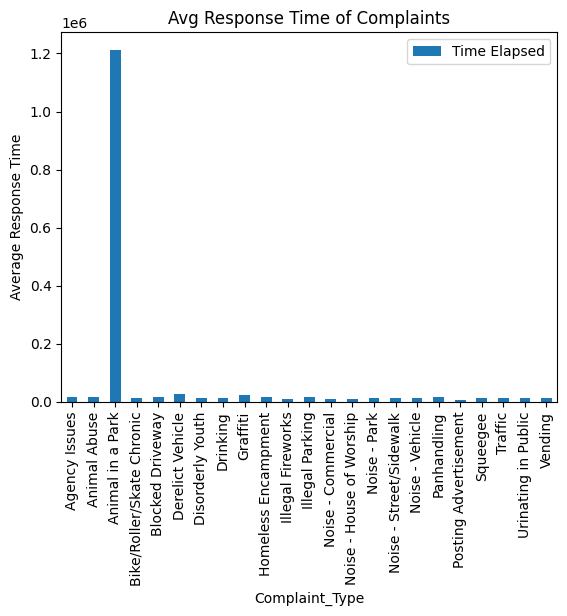

In [31]:
# 5.1 Visualize the average of Request_Closing_Time
Resolution = df.groupby(['Complaint Type'])[['Time Elapsed']].mean()
Resolution.plot(kind='bar',title='Avg Response Time of Complaints', xlabel='Complaint_Type', ylabel='Average Response Time')
plt.show()

### 6. Identify the significant variables by performing statistical analysis using p-values 

In [32]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 7. Perform a Krushal-Wallis H test

In [39]:
# 7.1 Fail to reject H0: All sample distributions are equal


In [40]:
# 7.2 Reject H0: One or more sample distributions are not equal

### 8 Present your observations

1. Brooklyn City records highest number of complaints followed by New York city 
2. Blocked Driveway and Illegal Parking are the major complaint areas. 
3. Street/sidewalk noise and Commercial Noise are the major Complaints in NYC followed by Illegal Parking.
4. We can see that most of the complaints are resolved in a day but reponse time for type 'Animal in a Park' takes longer
5. Complaint Type are Depentent on Location Type.
6. Time taken for solving different complaint type are different.